In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

 # Part 1


Fuel-efficiency data: ‘hwy’ is highway efficiency, ‘cty’ is city fuel efficiency.

Realize scatter plots of displacement (‘displ’) vs. highway efficiency (‘hwy’)

1. Simple, basic scatter plot of displ vs. hwy

Same as above, but additionally mapping each automobile class (‘class’) to:

- a different shape/symbol

- a different color

- a color or brightness and shape/symbol

- a brightness - determined by mean displacement for the class

- a shape whose size is determined by mean displacement for the class

(Question: How can you control the brightness of a mark?)

In [201]:
df = pd.read_csv("mpg.csv")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [134]:
mean_displ = df.groupby(["class"]).mean()['displ'].reset_index()
mean_displ.columns=['class','mean_displ']
#mean_displ.mean_displ = mean_displ.mean_displ/max(mean_displ.mean_displ)
mean_displ

,class,mean_displ
0,2seater,6.160000
1,compact,2.325532
2,midsize,2.921951
3,minivan,3.390909
4,pickup,4.418182
5,subcompact,2.660000
6,suv,4.456452


In [75]:
classes = mean_displ['class']
classes

0       2seater
1       compact
2       midsize
3       minivan
4        pickup
5    subcompact
6           suv
Name: class, dtype: object

In [132]:
df1=df.merge(mean_displ, on ='class')
df1

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_displ
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,0.377521
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,0.377521
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0.377521
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0.377521
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,0.377521
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,0.431818
230,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,0.431818
231,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact,0.431818
232,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,0.431818


In [104]:
for i in classes:
    df1=df[df['class'] == i]
    alpha = int(mean_displ['mean_displ'][mean_displ['class'] == i].values*10)**3
    print(alpha)

1000
27
64
125
343
64
343


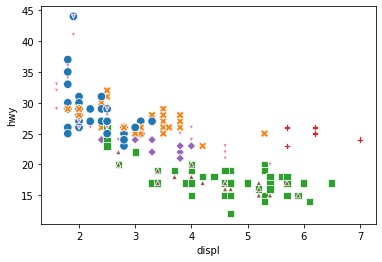

In [308]:
sns.scatterplot(x="displ", y="hwy",style="class",color='b',size="class", data=df, hue="class", legend = False)

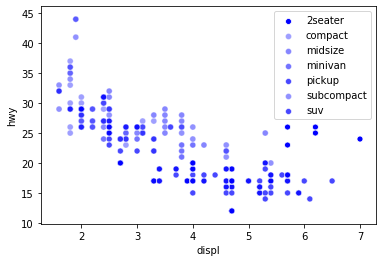

In [126]:
for i in classes:
    df1=df[df['class'] == i]
    alpha = mean_displ['mean_displ'][mean_displ['class'] == i].values
    ax = sns.scatterplot(x="displ", y="hwy",style="class",color='b',alpha=alpha, data=df1, label = i,legend =False)
    plt.legend()

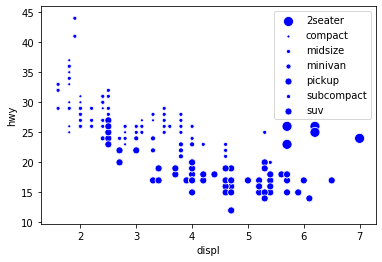

In [128]:
for i in classes:
    df1=df[df['class'] == i]
    alpha = int(mean_displ['mean_displ'][mean_displ['class'] == i].values*10)**2
    ax = sns.scatterplot(x="displ", y="hwy",style="class",color='b',s=alpha, data=df1,label=i, legend = False)
    plt.legend()

Faceting
Use mpg.csv to complete the following exercises:

Create multiple plots, facetted by class. In each, scatterplot displacement vs. hwy

Same as 1, with facets sorted by mean displacement

Same as 2, but distinguish transmission type (auto/manual) using color and draw regression per transmission type

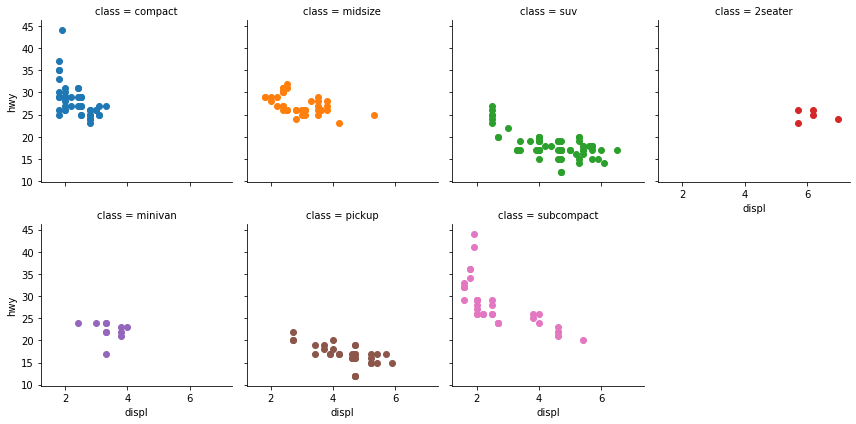

In [268]:
g = sns.FacetGrid(df, col='class', hue='class',col_wrap=4)
g.map(plt.scatter,'displ', 'hwy')


In [135]:
df2=df.merge(mean_displ, on ='class')
df2

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mean_displ
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,2.325532
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,2.325532
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,2.325532
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,2.325532
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,2.325532
...,...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,2.660000
230,volkswagen,new beetle,2.0,1999,4,manual(m5),f,21,29,r,subcompact,2.660000
231,volkswagen,new beetle,2.0,1999,4,auto(l4),f,19,26,r,subcompact,2.660000
232,volkswagen,new beetle,2.5,2008,5,manual(m5),f,20,28,r,subcompact,2.660000


In [202]:
df=df.replace(to_replace=('auto(l5)','auto(l4)','auto(s6)','auto(av)','auto(l3)', 'auto(l6)', 'auto(s5)', 'auto(s4)'), value='auto')
df=df.replace(to_replace=('manual(m5)','manual(m6)'), value='manual')


In [203]:
df.trans.unique()

array(['auto', 'manual'], dtype=object)

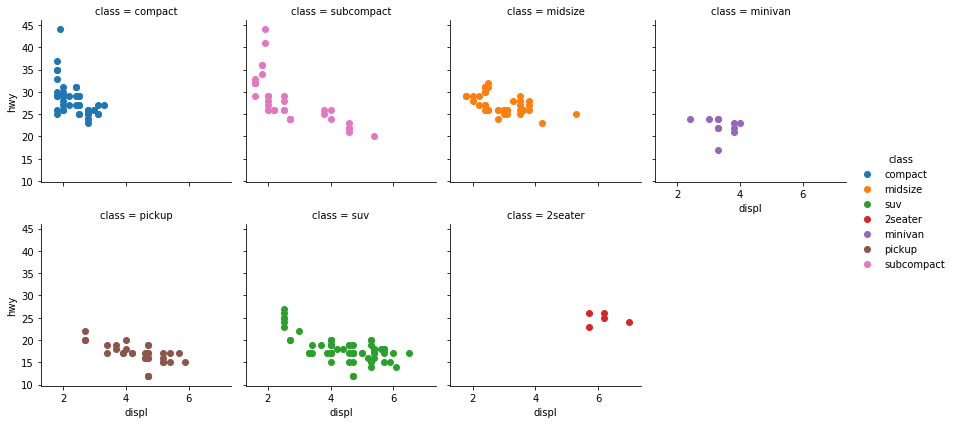

In [210]:
g = sns.FacetGrid(df1, col='class', col_order=df1.groupby(['class']).mean()['displ'].sort_values().index, hue='class',col_wrap=4)
g.map(plt.scatter, 'displ', 'hwy')
g.add_legend()


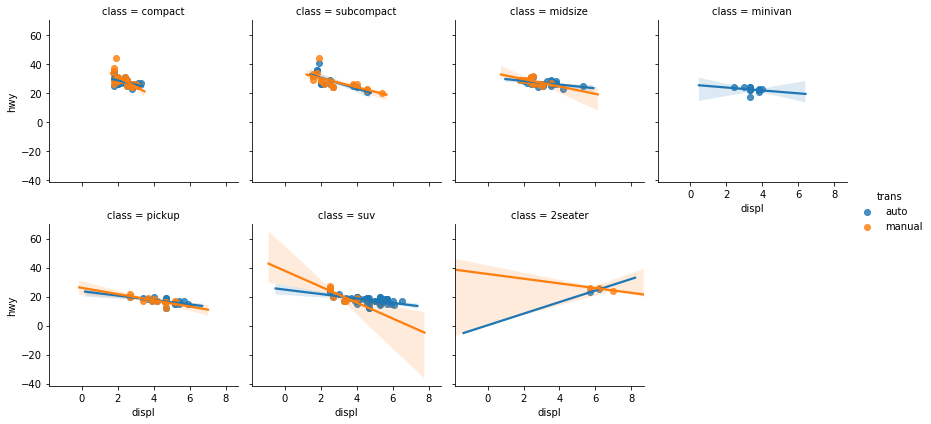

In [207]:
g = sns.FacetGrid(df, col='class', col_order=df.groupby(['class']).mean()['displ'].sort_values().index, hue='trans', col_wrap=4)
g.map(sns.regplot,'displ', 'hwy')
g.add_legend()

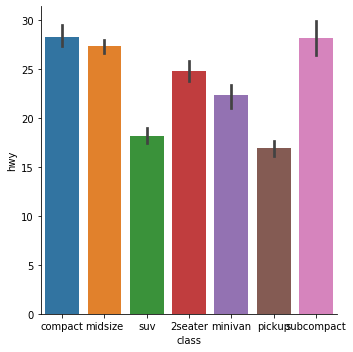

In [260]:
 sns.catplot("class", "hwy", data=df, kind="bar")

Transforming
Use burtin.json to complete the following exercises:

Use the Burtin data set to make bar plots, grouped by bacterium.

- Without any transformation

- With a log transform applied to antibiotic-dosage

Use the Burtin data to make heatmaps:

- Make standard heatmap of the data

- Make a clustermap of the data

In [321]:
df3 = pd.read_json("burtin.json")
df3.head

<bound method NDFrame.head of                            bacteria  penicillin  streptomycin  neomycin  \
0        Mycobacterium tuberculosis     800.000          5.00     2.000   
1         Salmonella schottmuelleri      10.000          0.80     0.090   
2                  Proteus vulgaris       3.000          0.10     0.100   
3             Klebsiella pneumoniae     850.000          1.20     1.000   
4                  Brucella abortus       1.000          2.00     0.020   
5            Pseudomonas aeruginosa     850.000          2.00     0.400   
6                  Escherichia coli     100.000          0.40     0.100   
7   Salmonella (Eberthella) typhosa       1.000          0.40     0.008   
8              Aerobacter aerogenes     870.000          1.00     1.600   
9                 Brucella antracis       0.001          0.01     0.007   
10            Streptococcus fecalis       1.000          1.00     0.100   
11            Staphylococcus aureus       0.030          0.03     0.00

In [269]:
df3.describe()

,penicillin,streptomycin,neomycin
count,16.000000,16.000000,16.000000
mean,217.878063,3.065000,4.089187
std,373.495060,4.502691,10.133165
min,0.001000,0.010000,0.001000
25%,0.006500,0.325000,0.017000
50%,1.000000,1.000000,0.100000
75%,275.000000,2.750000,1.700000
max,870.000000,14.000000,40.000000


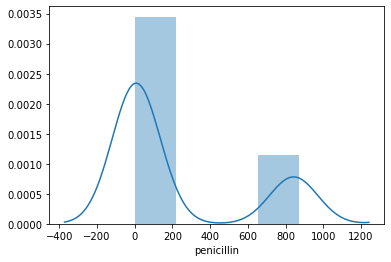

In [272]:
sns.distplot(df3['penicillin'])

In [219]:
df3.penicillin = df3.penicillin/max(df3.penicillin)
df3.neomycin = df3.neomycin/max(df3.neomycin)
df3.streptomycin = df3.streptomycin/max(df3.streptomycin)

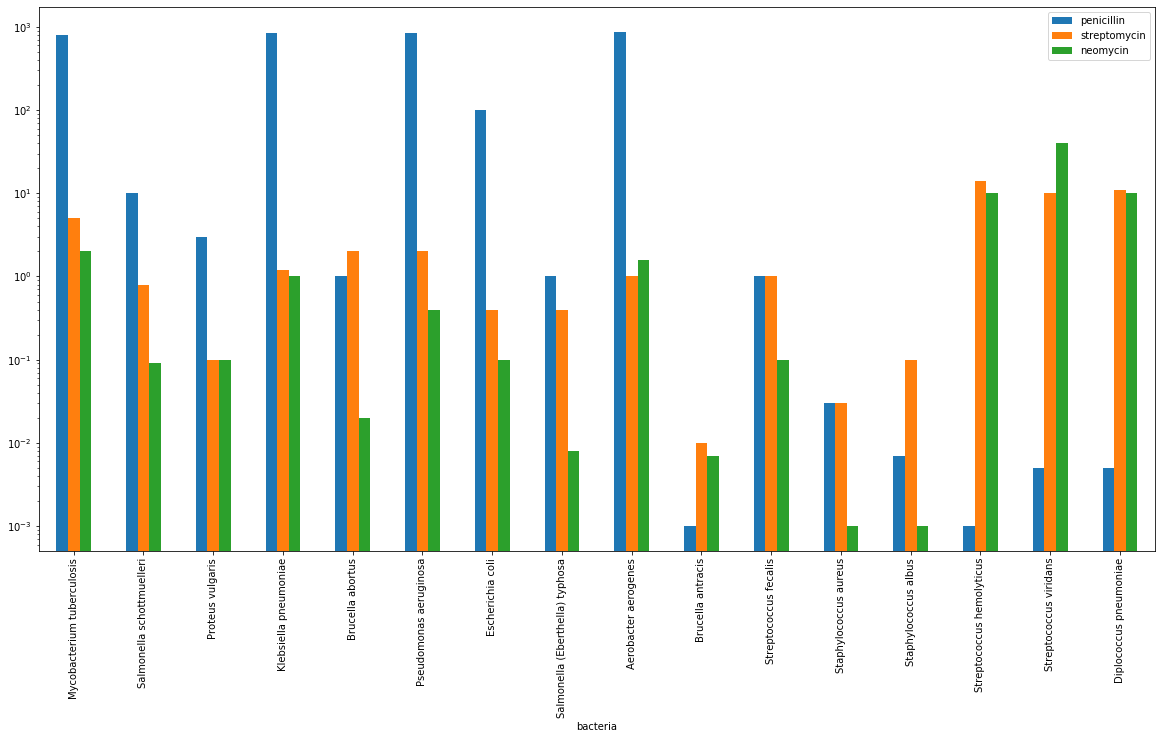

In [309]:
g=df3.plot(x="bacteria", y=["penicillin", "streptomycin", "neomycin"], kind="bar", figsize=(20,10))
g.set_yscale("log")

In [275]:
df3['log_penicilin'] = np.log(df3['penicillin'])

In [283]:
import altair as alt 

In [330]:
chart1=alt.Chart(df3).mark_bar().encode(
    x='bacteria',  # specify ordinal data
    y='penicillin'  # specify quantitative data
)
chart2=alt.Chart(df3).mark_bar().encode(
    x='bacteria',  # specify ordinal data
    y='streptomycin'  # specify quantitative data
)

alt.hconcat(chart1, chart2)

alt.HConcatChart(...)

In [334]:
base = alt.Chart(df3).encode(x='bacteria')

alt.layer(
    base.mark_bar(color='blue').encode(y='penicillin'),
    base.mark_bar(color='red').encode(y='streptomycin'),
    base.mark_bar(color='green').encode(y='neomycin')
)

alt.LayerChart(...)

In [323]:
# 2 (alt) Apply log transform to data...
for name in df3.columns:
    if name == 'bacteria' or name == 'gram':
        continue
    df3[name] = df3[name].apply(np.log)
df3.head()


,bacteria,penicillin,streptomycin,neomycin,gram
0,Mycobacterium tuberculosis,6.684612,1.609438,0.693147,negative
1,Salmonella schottmuelleri,2.302585,-0.223144,-2.407946,negative
2,Proteus vulgaris,1.098612,-2.302585,-2.302585,negative
3,Klebsiella pneumoniae,6.745236,0.182322,0.000000,negative
4,Brucella abortus,0.000000,0.693147,-3.912023,negative


In [324]:
df3.isna().sum()

bacteria        0
penicillin      0
streptomycin    0
neomycin        0
gram            0
dtype: int64

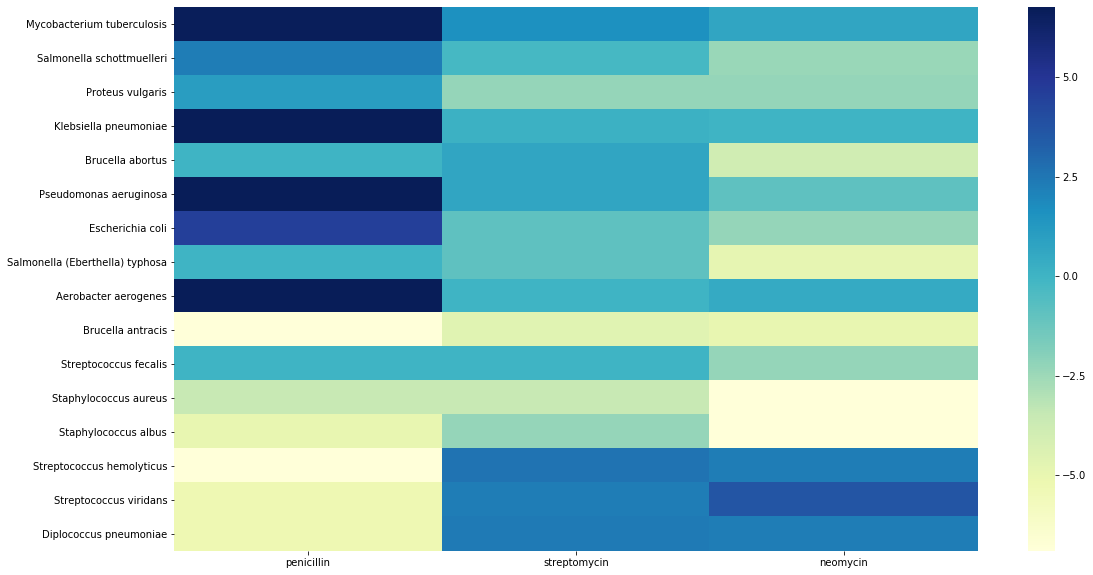

In [326]:
labels = ['penicillin','streptomycin','neomycin']
fig, ax = plt.subplots(figsize=(18,10))        

ax = sns.heatmap(df3.drop(['bacteria','gram'],1), yticklabels=df3['bacteria'],cmap='YlGnBu')

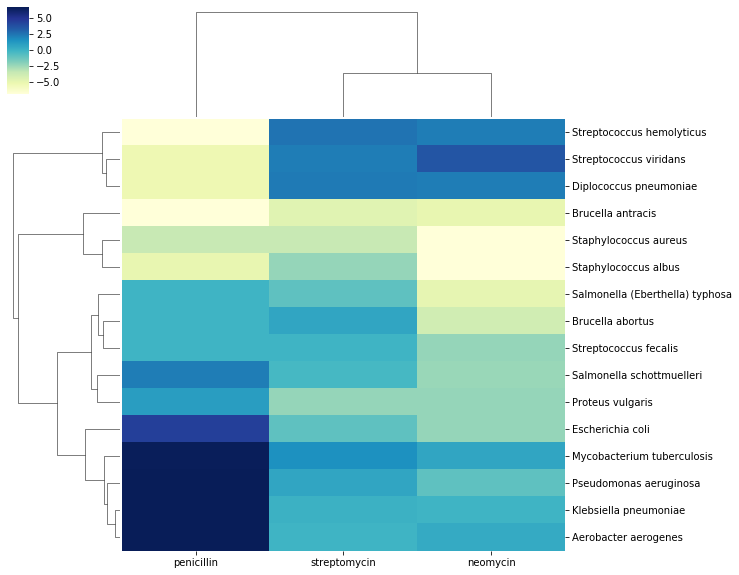

In [327]:
labels = ['penicillin','streptomycin','neomycin']
cg = sns.clustermap(df3.drop(['bacteria','gram'],1), yticklabels=df3['bacteria'],cmap='YlGnBu')
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None